In [1]:
from tw_functions import autenticar, get_tweets
import indicoio
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
api = autenticar()
indicoio.config.api_key = "api_key"

In [3]:
candidatos = ["AlfredoRamosM", "QuinteroCalle", "jcvelezuribe","JDValde", "BeatrizRave","VictorJCorreaV"]

In [4]:
mean_sentiments = {}
for candidato in candidatos:
    with open(f'tweets/{candidato}.txt', 'r') as f:
        tweets = f.readlines()
    all_text = " ".join(tweets)
    all_text = all_text.replace('\n', ' ').replace('\r', '')
    all_text = re.sub(r'[^\w\s]','',all_text)
    mean_sentiments[candidato] = indicoio.sentiment(all_text)

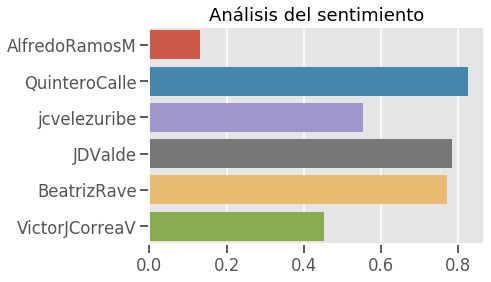

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_context("talk")
serie = pd.Series(mean_sentiments)
sns.barplot(serie.values, serie.index, orient="h")
plt.title("Análisis del sentimiento")
plt.savefig(f'imagenes/sentimiento.png', bbox_inches='tight')
plt.show()